<a href="https://colab.research.google.com/github/ThakurGumansingh/Cryptocurrency_price_prediction/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf


In [ ]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-04-13,40123.570312,41430.054688,39712.746094,41166.730469,41166.730469,27691105228
2022-04-14,41160.218750,41451.480469,39695.746094,39935.515625,39935.515625,24342001973
2022-04-15,39939.402344,40617.722656,39866.832031,40553.464844,40553.464844,21756855753


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


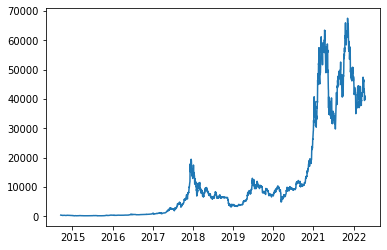

In [ ]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
#Train test split
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

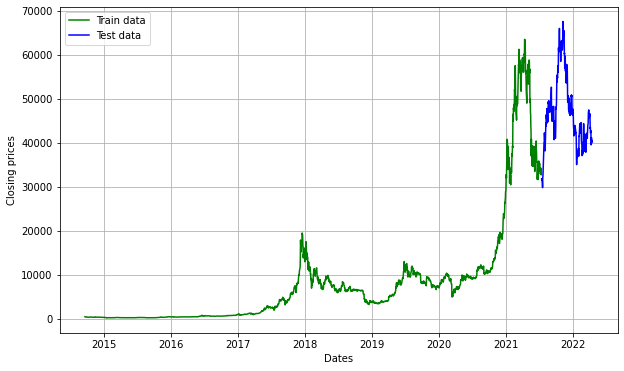

In [ ]:
#split data into training and testing set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row] ['Adj Close'], 'green', label= 'Train data')
plt.plot(df[to_row:] ['Adj Close'], 'blue', label= 'Test data')
plt.legend()

In [ ]:
model_predictions = []
n_test_obser = len(testing_data)

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
#  print(output)
#  break

In [ ]:
list(output[0])[0]

40493.096536529105

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2768
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22401.442
Method:                       css-mle   S.D. of innovations            791.608
Date:                Sun, 17 Apr 2022   AIC                          44814.883
Time:                        10:26:40   BIC                          44850.439
Sample:                             1   HQIC                         44827.725
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4390     15.333      0.942      0.346     -15.613      44.491
ar.L1.D.y     -0.0242      0.019     -1.276      0.202      -0.061       0.013
ar.L2.D.y     -0.0045      0.019     -0.236      0.8

In [ ]:
len(testing_data)

277

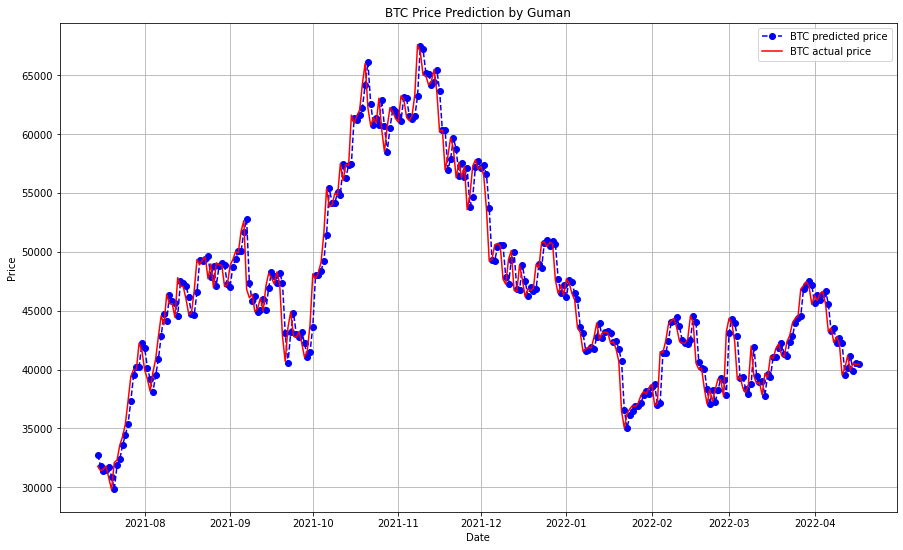

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions[:], color = 'blue', marker = 'o', linestyle = 'dashed', label = "BTC predicted price")
plt.plot(date_range, testing_data, color = 'red', label = "BTC actual price")

plt.title('BTC Price Prediction by Guman')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#report performance
mape = np.mean(np.abs(np.array(model_predictions[:]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+ str(mape)) #Mean absolute percentage error

#around 3.8% MAPE implies the model is about 96.2% accurate in predicting the test set observations.

MAPE: 0.02557395440225832
